In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
# Below is the function to load training and testing data
def load_data(batch_size_train, batch_size_test):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('dataset', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((64, 64)),
                           transforms.ToTensor()])),
        batch_size=batch_size_train, shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('dataset', train=False,
                       transform=transforms.Compose([
                           transforms.Resize((64, 64)),
                           transforms.ToTensor()])),
        batch_size=batch_size_test, shuffle=True)

    return train_loader, test_loader

In [24]:
# Below is defining the network structure
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 5 * 5, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2)
        x = F.max_pool2d(F.relu(self.conv3(x)), kernel_size=2)
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [25]:
# Below is to calculate total parameters of the model
def count_params(name, model):
    total_params = sum(p.numel() for p in model.parameters())
    print(f'{name}: {total_params}')
    return total_params

In [26]:
# Below we are initializing the optimizer
def optimizer_setup(network):
    return optim.SGD(network.parameters(), lr=0.001, momentum=0.9, nesterov=True)

In [27]:
# Training the network for a single epoch
def train_epoch(network, optim, data_loader):
    network.train()
    for batch_idx, (input_data, targets) in enumerate(data_loader):
        input_data, targets = Variable(input_data), Variable(targets)
        optim.zero_grad()
        predictions = network(input_data)
        loss_function = nn.CrossEntropyLoss()
        loss = loss_function(predictions, targets)
        loss.backward()
        optim.step()

In [28]:
# Evaluating model performance and compute accuracy/loss
def evaluate_model(network, data_loader):
    total_correct = 0
    total_samples = 0
    total_loss = 0
    batch_counter = 0
    loss_function = nn.CrossEntropyLoss()
    with torch.no_grad():
        for input_data, targets in data_loader:
            predictions = network(input_data)
            loss = loss_function(predictions, targets)
            total_loss += loss.item()
            batch_counter += 1
            for idx, prediction in enumerate(predictions):
                if torch.argmax(prediction) == targets[idx]:
                    total_correct += 1
                total_samples += 1
    avg_loss = total_loss / batch_counter
    accuracy = total_correct / total_samples
    return avg_loss, round(accuracy, 3)

In [29]:
# Set training parameters
num_epochs = 28

# Train the network across multiple epochs and track performance
def run_training(network, optimizer, train_loader, test_loader):
    training_loss = []
    testing_loss = []
    training_accuracy = []
    testing_accuracy = []

    print("Training started...")
    for epoch in range(1, num_epochs + 1):
        train_epoch(network, optimizer, train_loader)
        train_loss, train_acc = evaluate_model(network, train_loader)
        test_loss, test_acc = evaluate_model(network, test_loader)

        training_loss.append(train_loss)
        testing_loss.append(test_loss)
        training_accuracy.append(train_acc)
        testing_accuracy.append(test_acc)
        print(f'Epoch {epoch}: Test Loss - {test_loss}')

    print("Training completed.")
    return training_loss, testing_loss, training_accuracy, testing_accuracy


In [30]:
# Loading data
train_loader, test_loader = load_data(75, 75)

In [31]:
# Initialize first model and optimizer
model1 = ConvNet()
optimizer1 = optimizer_setup(model1)
train_loss_1, test_loss_1, train_acc_1, test_acc_1 = run_training(model1, optimizer1, train_loader, test_loader)


Training started...
Epoch 1: Test Loss - 1.534786121169133
Epoch 2: Test Loss - 0.21807189302435562
Epoch 3: Test Loss - 0.13517414895233823
Epoch 4: Test Loss - 0.0834023545343262
Epoch 5: Test Loss - 0.07633730019234232
Epoch 6: Test Loss - 0.06312637514810064
Epoch 7: Test Loss - 0.06136776222291389
Epoch 8: Test Loss - 0.0495226043241738
Epoch 9: Test Loss - 0.05071236136362457
Epoch 10: Test Loss - 0.05230458695163478
Epoch 11: Test Loss - 0.047703446944612565
Epoch 12: Test Loss - 0.04520524507770732
Epoch 13: Test Loss - 0.040194745128192426
Epoch 14: Test Loss - 0.03619710835384956
Epoch 15: Test Loss - 0.03772711270026612
Epoch 16: Test Loss - 0.03338276531989078
Epoch 17: Test Loss - 0.04108982816262087
Epoch 18: Test Loss - 0.04015835632922809
Epoch 19: Test Loss - 0.037968207287311956
Epoch 20: Test Loss - 0.044205950945355135
Epoch 21: Test Loss - 0.04202799320719622
Epoch 22: Test Loss - 0.03650972816950655
Epoch 23: Test Loss - 0.03815485226824869
Epoch 24: Test Loss - 0

In [32]:
# Load larger batch data
train_loader, test_loader = load_data(500, 500)

In [33]:
# Initializing second model and optimizer
model2 = ConvNet()
optimizer2 = optimizer_setup(model2)
train_loss_2, test_loss_2, train_acc_2, test_acc_2 = run_training(model2, optimizer2, train_loader, test_loader)



Training started...
Epoch 1: Test Loss - 2.300589752197266
Epoch 2: Test Loss - 2.2983144998550413
Epoch 3: Test Loss - 2.2947537183761595
Epoch 4: Test Loss - 2.2881964087486266
Epoch 5: Test Loss - 2.2727399826049806
Epoch 6: Test Loss - 2.197253906726837
Epoch 7: Test Loss - 0.8190197616815567
Epoch 8: Test Loss - 0.4243930622935295
Epoch 9: Test Loss - 0.3323363497853279
Epoch 10: Test Loss - 0.28605983927845957
Epoch 11: Test Loss - 0.24709784910082816
Epoch 12: Test Loss - 0.21187340542674066
Epoch 13: Test Loss - 0.1853732593357563
Epoch 14: Test Loss - 0.169605016335845
Epoch 15: Test Loss - 0.14975571520626546
Epoch 16: Test Loss - 0.1350452084094286
Epoch 17: Test Loss - 0.12193234339356422
Epoch 18: Test Loss - 0.11207143627107144
Epoch 19: Test Loss - 0.10496771298348903
Epoch 20: Test Loss - 0.09637868069112301
Epoch 21: Test Loss - 0.08988389968872071
Epoch 22: Test Loss - 0.08512612041085958
Epoch 23: Test Loss - 0.08465233407914638
Epoch 24: Test Loss - 0.07910206355154

In [34]:
# Convert model parameters to vector form for interpolation
params_model1 = torch.nn.utils.parameters_to_vector(model1.parameters())
params_model2 = torch.nn.utils.parameters_to_vector(model2.parameters())

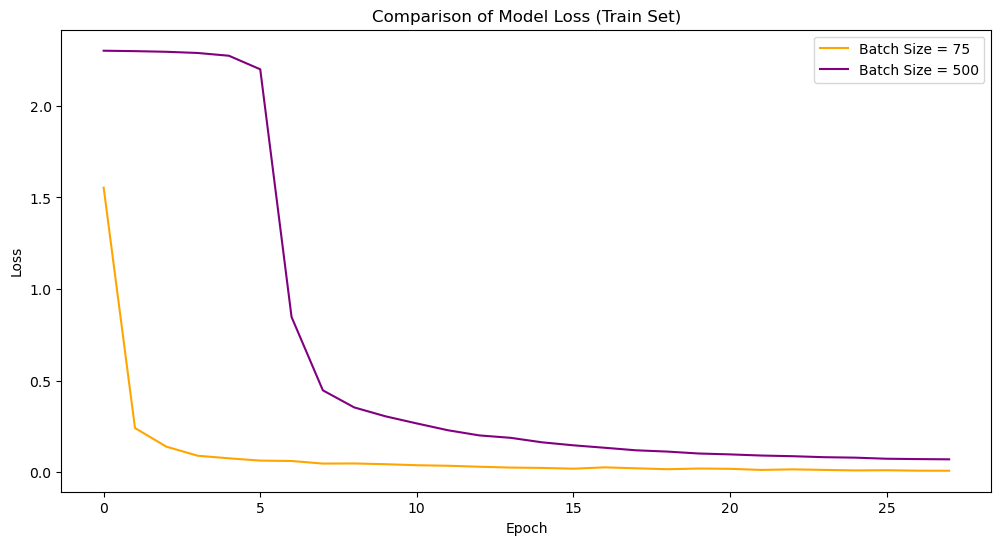

In [35]:
# Plot training loss comparison
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_epochs), train_loss_1, color='orange')
plt.plot(np.arange(num_epochs), train_loss_2, color='purple')
plt.title('Comparison of Model Loss (Train Set)')
plt.legend(['Batch Size = 75', 'Batch Size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

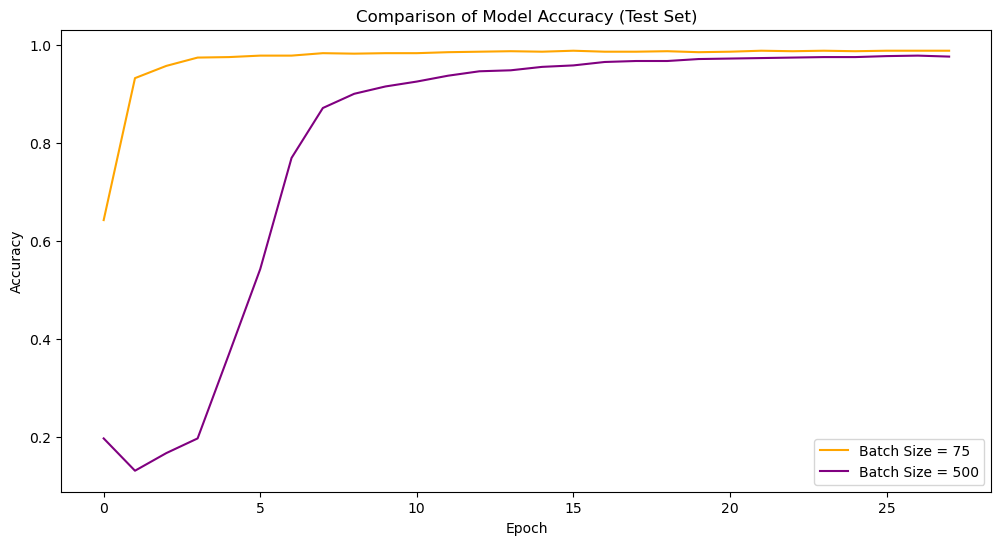

In [36]:
# Plot testing accuracy comparison
plt.figure(figsize=(12, 6))
plt.plot(np.arange(num_epochs), test_acc_1, color='orange')
plt.plot(np.arange(num_epochs), test_acc_2, color='purple')
plt.title('Comparison of Model Accuracy (Test Set)')
plt.legend(['Batch Size = 75', 'Batch Size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [37]:
# Interpolate between the two models
interpolation_values = np.arange(-2, 2, 0.2)
interpolated_params = []
for alpha in interpolation_values:
    theta = (1 - alpha) * params_model1 + alpha * params_model2
    interpolated_params.append(theta)

In [38]:
# Evaluating interpolated models
train_loss_interp = []
test_loss_interp = []
train_acc_interp = []
test_acc_interp = []

for idx, theta in enumerate(interpolated_params):
    print(f'Evaluating interpolated model {idx}')
    interpolated_model = ConvNet()
    torch.nn.utils.vector_to_parameters(theta, interpolated_model.parameters())

    train_loss, train_acc = evaluate_model(interpolated_model, train_loader)
    test_loss, test_acc = evaluate_model(interpolated_model, test_loader)

    train_loss_interp.append(train_loss)
    train_acc_interp.append(train_acc)
    test_loss_interp.append(test_loss)
    test_acc_interp.append(test_acc)

Evaluating interpolated model 0
Evaluating interpolated model 1
Evaluating interpolated model 2
Evaluating interpolated model 3
Evaluating interpolated model 4
Evaluating interpolated model 5
Evaluating interpolated model 6
Evaluating interpolated model 7
Evaluating interpolated model 8
Evaluating interpolated model 9
Evaluating interpolated model 10
Evaluating interpolated model 11
Evaluating interpolated model 12
Evaluating interpolated model 13
Evaluating interpolated model 14
Evaluating interpolated model 15
Evaluating interpolated model 16
Evaluating interpolated model 17
Evaluating interpolated model 18
Evaluating interpolated model 19


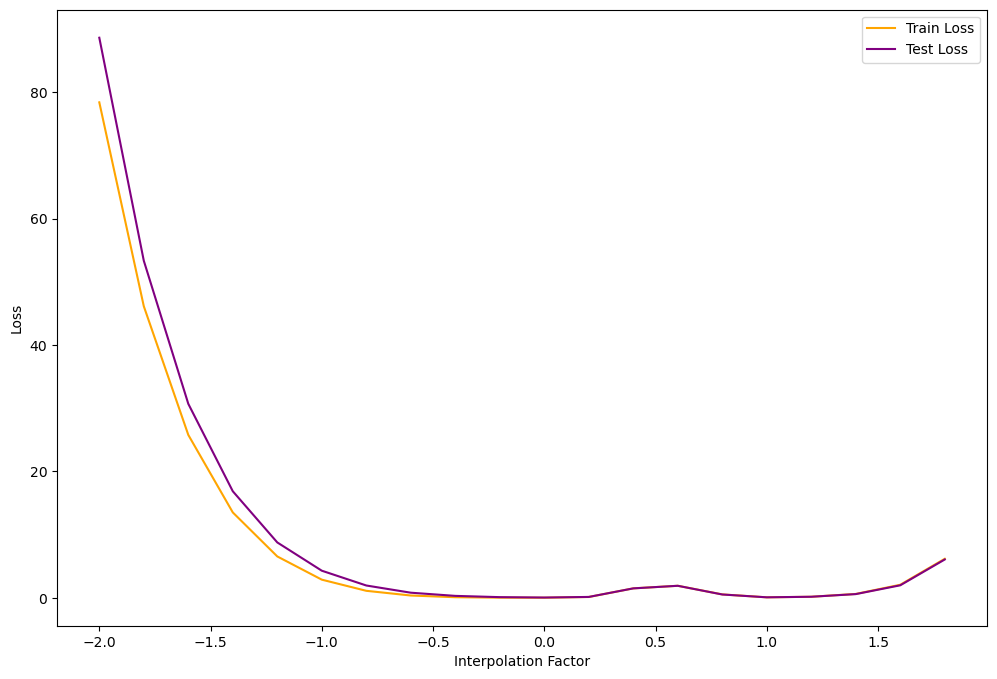

In [39]:
# Plot interpolation results
plt.figure(figsize=(12, 8))
plt.plot(interpolation_values, train_loss_interp, color='orange')
plt.plot(interpolation_values, test_loss_interp, color='purple')
plt.legend(['Train Loss', 'Test Loss'])
plt.xlabel('Interpolation Factor')
plt.ylabel('Loss')
plt.show()

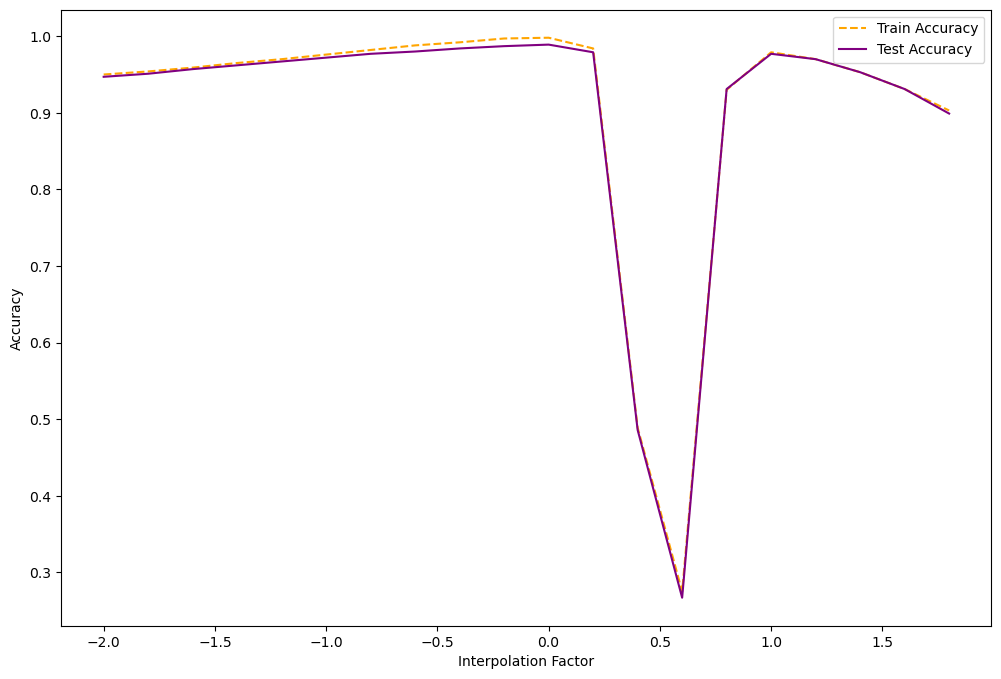

In [40]:
plt.figure(figsize=(12, 8))
plt.plot(interpolation_values, train_acc_interp, linestyle='--', color='orange')
plt.plot(interpolation_values, test_acc_interp, color='purple')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Interpolation Factor')
plt.ylabel('Accuracy')
plt.show()